# Exploratory Data Analysis

Let's review our objectives:

## Objectives: 
* Determine the likelihood of an arrest occurring during a Terry Stop
* Determine if there is a relationship between Terry Stops and a subject's race
* Do the differences in races between the officer and the subject play a role in arrests?
* How do Terry Stops in Seattle compare to the circumstances around *Terry v. Ohio*?

The first objective will be accomplished via our modeling, but we'll address our other questions here in our data analysis. So let's get started!

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('CSV_Files/eda_clean.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_gender,officer_race,subject_perceived_race,...,incident_year,incident_month,officer_age,dif_race,dif_gender,dif_race_gender,12am_6am,7am_12pm,1pm_6pm,7pm_11pm
0,Unknown,unassigned,20150000110760,33273,Offense Report,None,6355,F,White,White,...,2015,4,45,N,N,Y,0,1,0,0
1,Unknown,unassigned,20150000110760,33274,Offense Report,None,6355,F,White,White,...,2015,4,45,N,Y,Y,0,1,0,0
2,Unknown,unassigned,20150000120532,35462,Non-Custodial Arrest,None,7735,M,White,Not Specified,...,2015,4,24,Y,Y,Y,0,0,1,0
3,Unknown,unassigned,20150000127841,36993,Offense Report,None,7474,F,White,Not Specified,...,2015,4,46,Y,Y,Y,0,0,1,0
4,Unknown,unassigned,20150000145811,41041,Non-Custodial Arrest,None,4835,M,White,Not Specified,...,2015,5,56,Y,N,Y,0,0,1,0


# Is a relationship between Terry Stops and a subject's race?

This is a little tricky to answer because of the variety of stop resolutions. Let's look into this.

In [3]:
df.stop_resolution.value_counts()

Offense Report              14099
Non-Custodial Arrest         7591
Field Contact                5787
Arrest                       2199
Referred for Prosecution      688
Name: stop_resolution, dtype: int64

In [4]:
stops = df[['stop_resolution','weapon_type', 'final_call_type' ,'arrest_flag', 'frisk_flag']]

stops

,stop_resolution,weapon_type,final_call_type,arrest_flag,frisk_flag
0,Offense Report,None,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",N,N
1,Offense Report,None,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",N,N
2,Non-Custodial Arrest,None,--THEFT - CAR PROWL,N,Y
3,Offense Report,None,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",N,N
4,Non-Custodial Arrest,None,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,N
...,...,...,...,...,...
30359,Arrest,Firearm,"--ASSAULTS - HARASSMENT, THREATS",Y,Y
30360,Field Contact,Knife/Stabbing Instrument,--DISTURBANCE - FIGHT,N,Y
30361,Offense Report,Unknown,--CRISIS COMPLAINT - GENERAL,N,N
30362,Arrest,Unknown,"--ASSAULTS, OTHER",Y,N


In [5]:
# Let's look at what happens when someone is referred for prosecution
referral = stops[stops['stop_resolution'] == 'Referred for Prosecution']
referral

,stop_resolution,weapon_type,final_call_type,arrest_flag,frisk_flag
13,Referred for Prosecution,None,--TRAFFIC - MV COLLISION INVESTIGATION,N,N
14,Referred for Prosecution,None,--TRAFFIC - MV COLLISION INVESTIGATION,N,N
15,Referred for Prosecution,None,--TRAFFIC - MV COLLISION INVESTIGATION,N,N
268,Referred for Prosecution,None,--PROPERTY DEST (DAMG) - GRAFFITI (INCLUDES GANG),N,N
281,Referred for Prosecution,None,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,N,N
...,...,...,...,...,...
29690,Referred for Prosecution,None,"--WEAPON,PERSON WITH - OTHER WEAPON",N,Y
29691,Referred for Prosecution,None,--PROWLER - TRESPASS,N,N
29724,Referred for Prosecution,None,--MISCHIEF OR NUISANCE - GENERAL,N,N
29734,Referred for Prosecution,Knife/Stabbing Instrument,"--ASSAULTS - HARASSMENT, THREATS",N,Y


In [6]:
contacts = stops[stops['stop_resolution'] == 'Field Contact']
contacts

,stop_resolution,weapon_type,final_call_type,arrest_flag,frisk_flag
34,Field Contact,None,--THEFT - SHOPLIFT,N,N
35,Field Contact,None,--KIDNAP - GENERAL,N,Y
44,Field Contact,None,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,N
45,Field Contact,None,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,Y
46,Field Contact,None,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,Y
...,...,...,...,...,...
30353,Field Contact,Unknown,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,N,N
30355,Field Contact,Knife/Stabbing Instrument,--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY),N,Y
30358,Field Contact,Unknown,--PROWLER - GENERAL,N,N
30360,Field Contact,Knife/Stabbing Instrument,--DISTURBANCE - FIGHT,N,Y


In [7]:
# let's see if Field contacts result in arrests
contacts.arrest_flag.value_counts()

N    5787
Name: arrest_flag, dtype: int64

## Types of Stop Resolutions

* **Offense Reports** means that an officer (whether through dispatch or being stopped on the street) collects a report from witnesses or from victims about a crime that has taken place.  It can range from an officer collecting reports from people involved in a car accident to collecting suspect information from a murder.

* **Non-Custodial Arrest** means that a citation was given

* **Field Contacts** can range from anywhere from contacting community or gathering information on the area, and escalate to frisking.

* **Arrest**. Thanks to our relabeling in preprocessing, this simply means that a physical arrest too place.

* **Referred of Prosecution** appears to be yet another interesting category. While **Field Contacts** can result in frisking, it never **results** in a physical arrest. A **Referral for Prosecution** is a combination between receiving a citation but can also end in a physical arrest.  

## Seattle Demographics

With this in mind, let's look at Seattle's demographics.

According to **seattle.gov**, the estimated **racial** demographic breakdown **between 2014 and 2018** is as follows: 

Race/ethnicity:
* **White** - 64.5% (+/- 0.4 percentage pts.)
* **Black or African American** - 6.8% (+/- 0.3 percentage pts.)
* **American Indian & Alaska Native** - 0.5% (+/- 0.1 percentage pts.)
* **Asian** - 14.9% (+/- 0.4 percentage pts.)
* **Native Hawaiian & Other Pacific Islander** - 0.3% (+/- 0.1 percentage pts.)
* **Other race** - 0.3% (+/- 0.1 percentage pts.)
* **Two or more races** - 6.0% (+/- 0.2 percentage pts.)
* **Hispanic or Latino ethnicity (of any race)**: 6.6% (+/- 0.3 percentage pts.)

The populations for those years were:
* **2014** : 670,925
* **2015**: 688,156
* **2016**: 710,510
* **2017**: 729,601
* **2018**: 744,955

Let's go ahead and calculate the average of these and we can get our population estimates for each demographics.

In [8]:
pop2014 = 670925
pop2015 = 688156
pop2016 = 710510
pop2017 = 729601
pop2018 = 744955

avg_pop = round((pop2014 + pop2015 + pop2016 + pop2017 + pop2018)/5, 0)
avg_pop

708829.0

Now we'll calculate the population of each race

In [9]:
white = 0.645
black = 0.068
native_amer =  0.005
asian = 0.149
islander = 0.003
other = 0.06
hispanic = 0.066
multi = 0.06

# calculating populations
pop_white = round((avg_pop*white), 0)
pop_black = round((avg_pop*black), 0)
pop_native_amer = round((avg_pop*native_amer), 0)
pop_asian = round((avg_pop*asian), 0)
pop_islander = round((avg_pop*islander), 0)
pop_other = round((avg_pop*other), 0)
pop_hispanic = round((avg_pop*hispanic), 0)
pop_multi = round((avg_pop*multi), 0)

print('White Population: ', pop_white)
print('African-American Population: ', pop_black)
print('Native American Population: ', pop_native_amer)
print('Asian Population: ', pop_asian)
print('Islander Population: ', pop_islander)
print('Other Population: ', pop_other)
print('Hispanic Population: ', pop_hispanic)
print('Multi-Racial Population: ', pop_multi)

White Population:  457195.0
African-American Population:  48200.0
Native American Population:  3544.0
Asian Population:  105616.0
Islander Population:  2126.0
Other Population:  42530.0
Hispanic Population:  46783.0
Multi-Racial Population:  42530.0


## Demographics of Subjects

Before we calculate the ratio for each race that are stopped by the police, let's first check our values for 'subject_race'.

In [10]:
df.subject_perceived_race.value_counts()

White                        14471
Black or African American     9331
Not Specified                 2999
Hispanic                      1050
Asian                          986
Native American                899
Multi-Racial                   493
Other                          135
Name: subject_perceived_race, dtype: int64

If you remember, we added Islanders into Other because there were so few cases.  Let's do the same here.

In [11]:
pop_other = pop_other + pop_islander
pop_other

44656.0

Now we'll calculate the proportion of people stopped to their respective population.

In [12]:
# First we'll enter the values for known race  
stop_white = 14471
stop_black = 9331
stop_native_amer = 899
stop_asian = 986
stop_other = 135
stop_hispanic = 1050 
stop_multi = 493

# Now for the ratio according to their respective populations

ratio_white = stop_white/pop_white
ratio_black = stop_black/pop_black
ratio_native_amer = stop_native_amer/pop_native_amer
ratio_asian = stop_asian/pop_asian
ratio_other = stop_other/pop_asian
ratio_hispanic = stop_hispanic/pop_hispanic
ratio_multi = stop_multi/pop_multi

keys = ['White', 'African-American', 'Native American', 'Hispanic','Asian', 
        'Multi-Racial','Other']
vals = [ratio_white, ratio_black, ratio_native_amer, ratio_hispanic, 
        ratio_asian, ratio_multi, ratio_other]

ratio = {}

for key in keys:
    for val in vals:
        ratio[key] = val
        vals.remove(val)
        break

ratio_df = pd.DataFrame(ratio, index=[0])
ratio_df 

,White,African-American,Native American,Hispanic,Asian,Multi-Racial,Other
0,0.031652,0.193589,0.253668,0.022444,0.009336,0.011592,0.001278


Let's check out our **preliminary results**.

In [13]:
def seaborn_barplot(x=None, y=None, figsize=(13,8), data=None, xlabel=None, 
                    ylabel=None, title=None):
    """
    Input: Basic parameters for a Seaborn Bar Plot
    Output: A basic bar plot
    """
    fig = plt.figure(figsize=figsize)
    sns.set_style('darkgrid')

    sns.barplot(x=x, y=y, data=data)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title,
         fontsize=20)

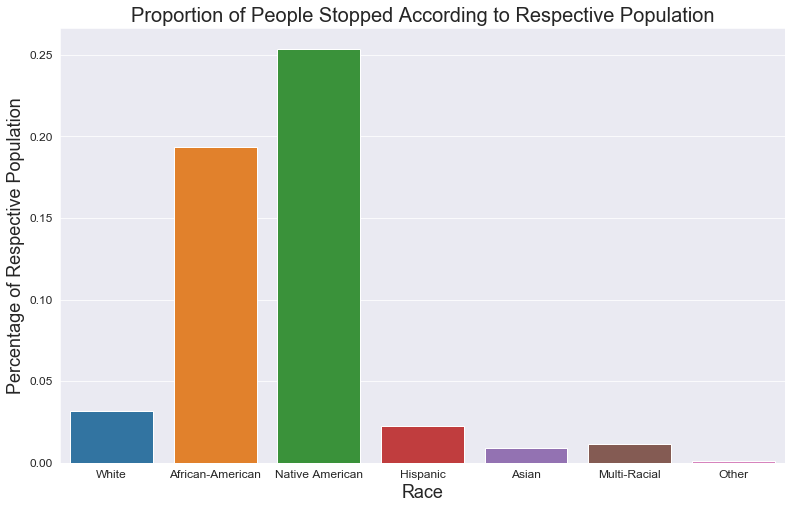

In [14]:
seaborn_barplot(data=ratio_df, xlabel='Race', 
                ylabel='Percentage of Respective Population', 
                title=('Proportion of People Stopped According' + 
                       ' to Respective Population'))

There is definitely a disproportionate amount of people being stopped who are Native American and African American.  However, this **represents EVERYONE** stopped.  This includes **Field Contacts** that could have been recording eye-witness accounts or someone **reporting an offense**.

We need to filter out **Offense Reports**.  It won't be perfect since the definition of a **Field Contact** is so vague, but it will at least give us a more accurate picture.

In [15]:
stop_frisk = df.copy()

stop_frisk = stop_frisk[stop_frisk['stop_resolution'] != 'Offense Report']
#print('Shape Before: ', stop_frisk.shape)

#for i in stop_frisk.index:
#    if stop_frisk.stop_resolution.iloc[i] == 'Field Contact':
#        if stop_frisk.frisk_flag.iloc[i] == 'N':
#            stop_frisk = stop_frisk.drop(index = stop_frisk.index[i], axis=0)
#print('Shape After: ', stop_frisk.shape)        

In [16]:
stop_frisk.subject_perceived_race.value_counts()

White                        7606
Black or African American    4942
Not Specified                1957
Asian                         567
Native American               494
Hispanic                      440
Multi-Racial                  191
Other                          68
Name: subject_perceived_race, dtype: int64

In [17]:
# First we'll enter the values for known race  
stop_white = 7606
stop_black = 4942
stop_native_amer = 494
stop_asian = 567
stop_other = 68
stop_hispanic = 440 
stop_multi = 191
# Now for the ratio according to their respective populations

ratio_white = stop_white/pop_white
ratio_black = stop_black/pop_black
ratio_native_amer = stop_native_amer/pop_native_amer
ratio_asian = stop_asian/pop_asian
ratio_other = stop_other/pop_asian
ratio_hispanic = stop_hispanic/pop_hispanic
ratio_multi = stop_multi/pop_multi

keys = ['White', 'African-American', 'Native American', 'Hispanic','Asian', 
        'Multi-Racial','Other']
vals = [ratio_white, ratio_black, ratio_native_amer, ratio_hispanic, 
        ratio_asian, ratio_multi, ratio_other]

ratio2 = {}

for key in keys:
    for val in vals:
        ratio2[key] = val
        vals.remove(val)
        break

ratio_df2 = pd.DataFrame(ratio2, index=[0])
ratio_df2

,White,African-American,Native American,Hispanic,Asian,Multi-Racial,Other
0,0.016636,0.102531,0.139391,0.009405,0.005369,0.004491,0.000644


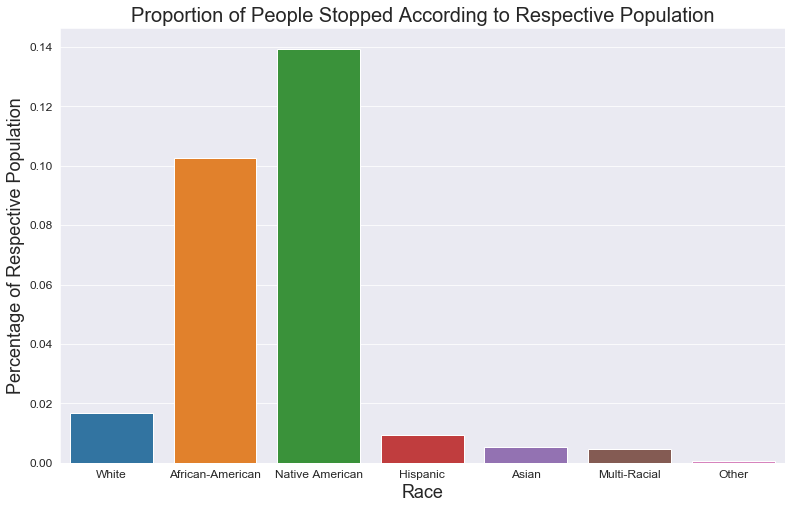

In [18]:
seaborn_barplot(data=ratio_df2, xlabel='Race', 
                ylabel='Percentage of Respective Population', 
                title=('Proportion of People Stopped According' + 
                       ' to Respective Population'))

It appears that Native Americans are stopped the most with African Americans coming in a close second.  Let's try one more filter.  Even though the resulting dataset will contain less than 3,000 samples, we're going to create a data frame that only has a **final call type** labeled **"Suspicious"**. This will hopefully eliminate variables such as responding to a crime scene, etc. and give us a results that are an **approximation** of what officer's (or citizens calling in) consider "suspicious". We will still **omit** rows containing **'Report Offense'** so that we aren't including victims of crimes.

In [19]:
sus = df[df.final_call_type.str.startswith('--SUSPICIOUS')]
sus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 4 to 30363
Data columns (total 30 columns):
subject_age_group           4148 non-null object
subject_id                  4148 non-null object
go_sc_num                   4148 non-null int64
terry_stop_id               4148 non-null int64
stop_resolution             4148 non-null object
weapon_type                 4148 non-null object
officer_id                  4148 non-null int64
officer_gender              4148 non-null object
officer_race                4148 non-null object
subject_perceived_race      4148 non-null object
subject_perceived_gender    4148 non-null object
initial_call_type           4148 non-null object
final_call_type             4148 non-null object
call_type                   4148 non-null object
arrest_flag                 4148 non-null object
frisk_flag                  4148 non-null object
precinct                    4148 non-null object
sector                      4148 non-null object
beat         

In [20]:
demographs = sus[['officer_race', 'subject_perceived_race', 'stop_resolution', 
           'final_call_type', 'arrest_flag', 'frisk_flag', 'dif_race', 
           'dif_gender', 'dif_race_gender']]

demographs.head()

,officer_race,subject_perceived_race,stop_resolution,final_call_type,arrest_flag,frisk_flag,dif_race,dif_gender,dif_race_gender
4,White,Not Specified,Non-Custodial Arrest,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,N,Y,N,Y
21,White,White,Offense Report,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,N,N,N,N,Y
22,White,White,Offense Report,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,N,N,N,Y,Y
26,White,White,Offense Report,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,N,N,N,N,Y
33,White,White,Offense Report,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,N,N,N,N,Y


In [21]:
demographs = demographs[demographs['stop_resolution'] != 'Offense Report']

In [22]:
demographs.subject_perceived_race.value_counts()

White                        834
Black or African American    411
Not Specified                369
Asian                         61
Native American               41
Hispanic                      17
Other                          6
Multi-Racial                   6
Name: subject_perceived_race, dtype: int64

In [23]:
# First we'll enter the values for known race  
stop_white = 834
stop_black = 411
stop_native_amer = 41
stop_asian = 61
stop_other = 6
stop_hispanic = 17 
stop_multi = 6
# Now for the ratio according to their respective populations

ratio_white = stop_white/pop_white
ratio_black = stop_black/pop_black
ratio_native_amer = stop_native_amer/pop_native_amer
ratio_asian = stop_asian/pop_asian
ratio_other = stop_other/pop_asian
ratio_hispanic = stop_hispanic/pop_hispanic
ratio_multi = stop_multi/pop_multi

keys = ['White', 'African-American', 'Native American', 'Hispanic','Asian', 
        'Multi-Racial','Other']
vals = [ratio_white, ratio_black, ratio_native_amer, ratio_hispanic, 
        ratio_asian, ratio_multi, ratio_other]

ratio3 = {}

for key in keys:
    for val in vals:
        ratio3[key] = val
        vals.remove(val)
        break

ratio_df3 = pd.DataFrame(ratio3, index=[0])
ratio_df3

,White,African-American,Native American,Hispanic,Asian,Multi-Racial,Other
0,0.001824,0.008527,0.011569,0.000363,0.000578,0.000141,0.000057


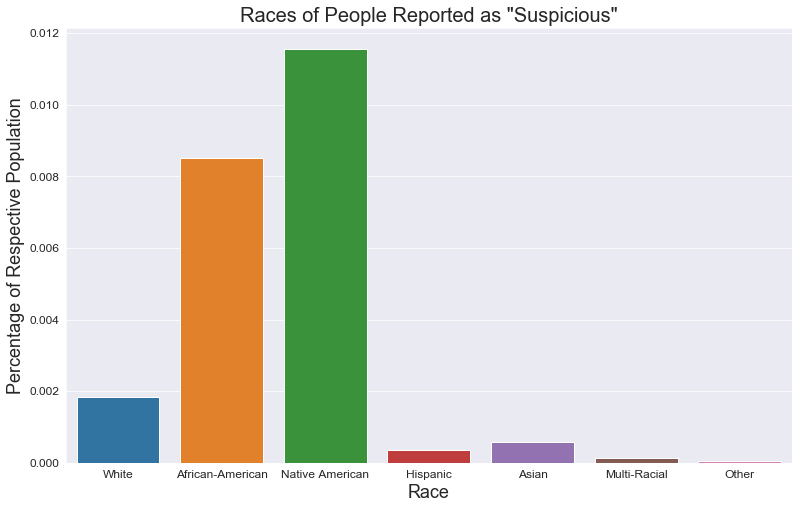

In [24]:
seaborn_barplot(data=ratio_df3, xlabel='Race', 
                ylabel='Percentage of Respective Population', 
                title='Races of People Reported as "Suspicious"')

### Results: 
In our final analysis, Native Americans are stopped the most with African Americans coming next.  On the surface level, it definitely looks as though racial discrimination plays a factor in who will be subjected to a Terry Stop.  There is still one problem, however, and that is: **Who is perpetuating this discrimination?**  The dataset **does not contain enough information** on whether the Terry Stop was **initiated** by an **officer** on the street, like in *Terry v. Ohio* or if it was **in response to a citizen** who called in reporting a suspicious person. After all, if it is in response to a citizen's complaint, an officer can only go off of a description given by the citizen.

### Recommendation
Update the reporting system to differentiate between officer initiated stops and stops that are in response to civilian reports.  After more data is gathered, we can reassess and develop a plan.

# Does difference in race play a role in arrests?

We'll subset our data frame so that it shows a difference in race, whether or not an arrest, occurred, and we'll go one step further and see if a frisking occurred.

In [25]:
treatment = df[['arrest_flag', 'frisk_flag', 'dif_race']]
treatment.head()

,arrest_flag,frisk_flag,dif_race
0,N,N,N
1,N,N,N
2,N,Y,Y
3,N,N,Y
4,N,N,Y


Next, we'll make 2 datasets: One where officer and subject are the same race and another where they are not.

In [26]:
same = treatment[treatment['dif_race'] == 'N']
diff = treatment[treatment['dif_race'] == 'Y']
print(same.shape)
print(diff.shape)

(11818, 3)
(18546, 3)


Now lets separate our data into categories we can compare: Same Race Arrests and Frisks & Different Race Arrests and Frisks

In [27]:
same_arrest = 0
same_frisk = 0
for i in range(len(same)):
    if same.arrest_flag.iloc[i] == 'Y':
        same_arrest += 1
    if same.frisk_flag.iloc[i] == 'Y':
        same_frisk += 1
print(f'Same Race: Arrests = {same_arrest}, Frisk Searches = {same_frisk}')

diff_arrest = 0
diff_frisk = 0

for i in range(len(same)):
    if diff.arrest_flag.iloc[i] == 'Y':
        diff_arrest += 1
    if diff.frisk_flag.iloc[i] == 'Y':
        diff_frisk += 1
print(f'Different Race: Arrests = {diff_arrest}, Frisk Searches = {diff_frisk}')

Same Race: Arrests = 844, Frisk Searches = 2715
Different Race: Arrests = 734, Frisk Searches = 3387


Since these are based on different sized sets, we'll do what we did with races and calculate the ratio of these values to their respective dataset sizes

In [28]:
arrest_same_ratio = same_arrest/len(same)
frisk_same_ratio = same_frisk/len(same)
arrest_diff_ratio = diff_arrest/len(diff)
frisk_diff_ratio = diff_frisk/len(diff)

In [29]:
keys = ['Same Race: Arrests', 'Same Race: Frisk Searches']
vals = [arrest_same_ratio, frisk_same_ratio]

same_race = {}

for key in keys:
    for val in vals:
        same_race[key] = val
        vals.remove(val)
        break

same_race_df = pd.DataFrame(same_race, index=[0])
same_race_df 

,Same Race: Arrests,Same Race: Frisk Searches
0,0.071416,0.229734


In [30]:
keys = ['Different Race: Arrests', 'Different Race: Frisk Searches']
vals = [arrest_diff_ratio, frisk_diff_ratio]

diff_race = {}

for key in keys:
    for val in vals:
        diff_race[key] = val
        vals.remove(val)
        break

diff_race = pd.DataFrame(diff_race, index=[0])
diff_race 

,Different Race: Arrests,Different Race: Frisk Searches
0,0.039577,0.182627


Let's join these in a single data frame for easy comparison

In [31]:
race_rel = pd.concat([same_race_df, diff_race], axis=1)

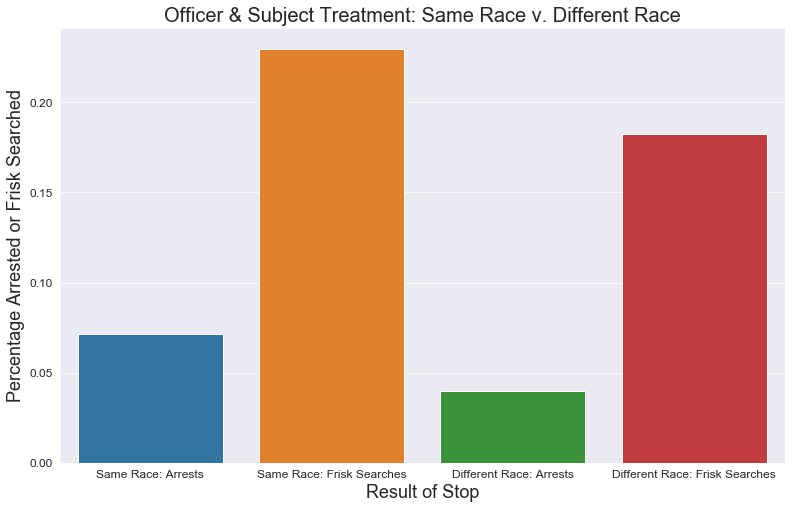

In [32]:
seaborn_barplot(data=race_rel, xlabel='Result of Stop', 
                ylabel='Percentage Arrested or Frisk Searched', 
                title=('Officer & Subject Treatment: '+ 
                       'Same Race v. Different Race'))


## Results
Well, this is surprising! Seattle officers that are of a different race from the subject are less likely to arrest or frisk them.  There could be a couple of reasons for this.  One is that an officer whose race is different is more hesitant and doesn't want to risk the possibility of their actions being considered racist.  Another explanation is that the officers in Seattle are assigned to beats where the local demographics match their own.  Either way, assuming that these arrests and frisk searches were warranted, it's good to see that the enforcement of the law is roughly equal. 

### Recommendation:

When we add these columns together, roughly **40% of people stopped are frisk searched**, but only around **10% of people are actually arrested**.  This gap is a little alarming and can also hurt public perception of the police considering that these subjects are still **racially disproportionate**.  Our **recommendation is for officers to show more restraint** in performing frisks until they have sufficient evidence based on the their **observations of the subject's behavior**.    

# How do Terry Stops in Seattle compare to the circumstances around *Terry v. Ohio*?

In the case of *Terry v. Ohio*, Officer McFadden made a judgment call **based on his observations** of the men's behavior and his **experience** in law enforcement.

While we can't quantify the experience of the Seattle officers, we CAN get a rough measurement of their judgment.

First, we'll do a brief recap of what we discovered in our last recommendation: The number of people frisked versus the number of people arrested.

In [33]:
arst_frsk = df[['arrest_flag', 'frisk_flag']]
print(arst_frsk.arrest_flag.value_counts())
print(arst_frsk.frisk_flag.value_counts())


N    28163
Y     2201
Name: arrest_flag, dtype: int64
N    22511
Y     7853
Name: frisk_flag, dtype: int64


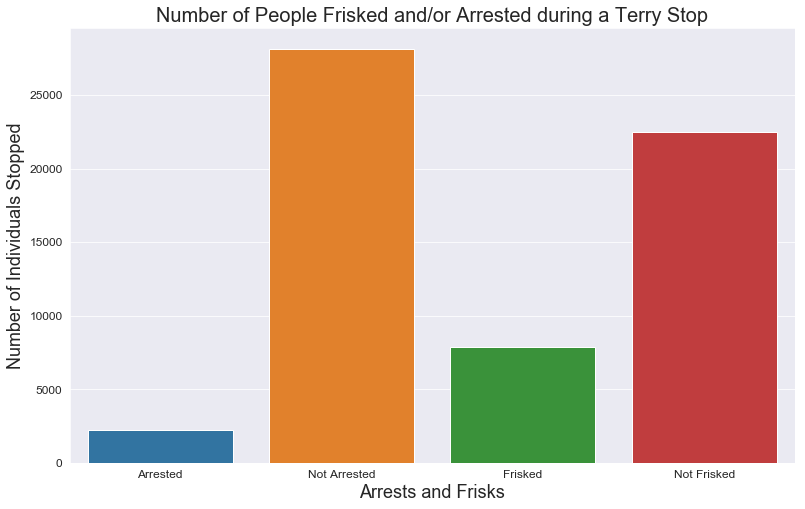

In [34]:
arrest_positive = 2201
arrest_negative = 28163
frisk_positive = 7853
frisk_negative = 22511

x = ['Arrested', 'Not Arrested', 'Frisked', 'Not Frisked']
y = [arrest_positive, arrest_negative, frisk_positive, frisk_negative]

seaborn_barplot(x=x, y=y, xlabel='Arrests and Frisks', 
                ylabel='Number of Individuals Stopped', 
                title=('Number of People Frisked and/or' + 
                       ' Arrested during a Terry Stop'))


## Initial Findings
On a surface level, this doesn't look good.  If we were to assume that these stops were made under the same circumstances as *Terry v. Ohio*, we would make the assumption that a majority of people are having their 4th Amendment Rights violated.  As mentioned before, the **gap** between the **number of people frisked** and **number of arrests** is **indicative** of this. We'll address this again in a second.

There is a problem though.  This assumes that the circumstances around each of the Seattle stops were (1). **Initiated** by an officer, and (2). a ***judgment call*** made by the officer who found these people suspicious.   

As we mentioned at the beginning, Terry Stops in Seattle have multiple outcomes. Let's find out the most common outcome of a Terry Stop. 

## Most Common Outcome of a Terry Stop

For this, we'll compare the values of the multiple **stop resolutions**.

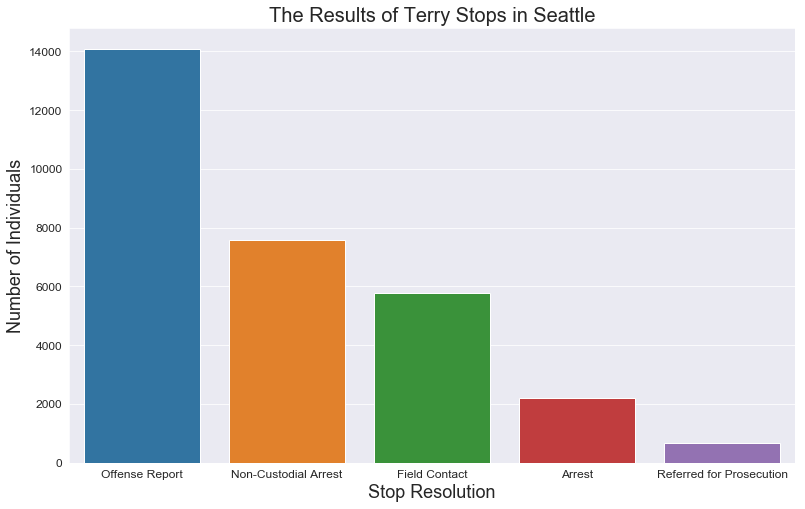

In [35]:
x = df['stop_resolution'].value_counts().index
y = df.stop_resolution.value_counts()

seaborn_barplot(x=x, y=y, xlabel='Stop Resolution', 
                ylabel='Number of Individuals', 
                title=('The Results of Terry Stops in Seattle'))

A **large majority** of officer interactions with subjects falls under the category of obtaining an **offense report**. Again, activities associated with this are **interviewing witnesses** and **obtaining information from victims** of crimes.  This doesn't resemble the circumstances surrounding *Terry v. Ohio*. 

Let's drop Offense Reports again and try this one more time. Then we'll calculate the number of people stopped and frisked.

In [36]:
no_reports = df[df['stop_resolution'] != 'Offense Report']

arrests = 0
frisks = 0
# filter out people who were frisked during an arrest
frisked_arrested = 0
for i in range(len(no_reports)):
    if no_reports.arrest_flag.iloc[i] == 'Y' and no_reports.frisk_flag.iloc[i] == 'N':
        arrests += 1
    elif no_reports.arrest_flag.iloc[i] == 'N' and no_reports.frisk_flag.iloc[i] == 'Y':
        frisks += 1
    elif no_reports.arrest_flag.iloc[i] == 'Y' and no_reports.frisk_flag.iloc[i] == 'Y':
        frisked_arrested += 1
        
gap = frisks - frisked_arrested

In [37]:
print(f'Arrests = {arrests}', f' Frisk Searches = {frisks}', 
      f'Frisked and Arrested = {frisked_arrested}', f'"The Gap" = {gap}')

Arrests = 1522  Frisk Searches = 3853 Frisked and Arrested = 679 "The Gap" = 3174


## Relationship of Frisks to Arrests

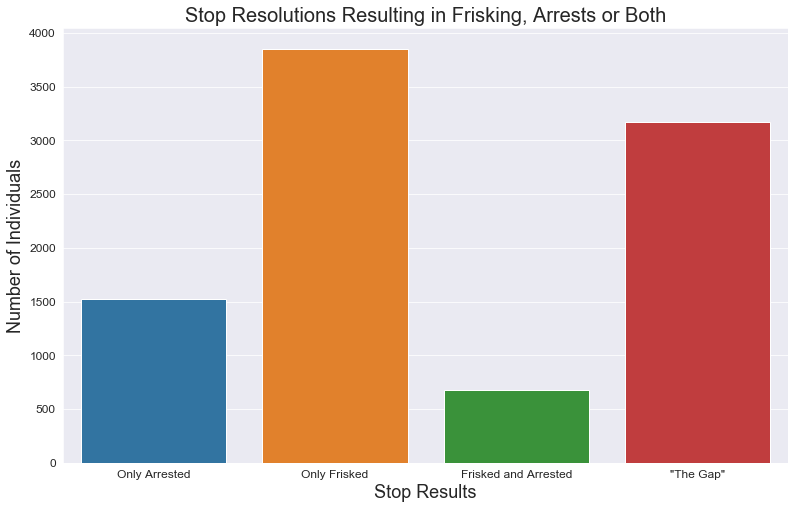

In [38]:
x = ['Only Arrested', 'Only Frisked', 'Frisked and Arrested', '"The Gap"']
y = [arrests, frisks, frisked_arrested, gap]

seaborn_barplot(x=x, y=y, xlabel='Stop Results', 
                ylabel='Number of Individuals', 
                title=('Stop Resolutions Resulting in' + 
                       ' Frisking, Arrests or Both'))

## Results
From the above we see that **many more innocent individuals were frisked** than people who were frisked and guilty of an offense.  This is an important distinction since **police are under much more scrutiny** than they were in 1964. If the case of *Terry v. Ohio* were to happen in 2020, and Officer McFadden had a track record of being right 1 out of every 5 times, there is a good chance that the Superior Court's decision would have been much different. 

As uncomfortable as it might make officers feel, in order to improve public perception, this gap needs to decrease, which again, means using better judgment and restraint in regards to pat-downs. 

### Recommendation:
Education.  **Invite behavioral analysts** and experts in the **field of Criminal Behavioral Science** to come and educate officers.  Doing so will **reduce** the number of people being unnecessarily frisked and will go a long way towards improving public perception.  

# Conclusion

To summarize our findings and recommendations:
* Seattle's **definition of a "Terry Stop"** is much **too broad** and barely resembles the circumstances surrounding their origin.  In order to improve public perception, the **data needs to become more precise** in what it is reporting.  This means **making distinctions** between **officer initiated** encounters and those that came as a result of a **citizen's report**.

* The treatment of officers towards subjects that are of a different race is slightly better than officers of the same race, but all of the officers could **benefit from a more reserved attitude toward frisking subjects**.

* To that end, we encourage **inviting experts in Criminal Behavior Science** to give lectures and **educate your officers** (possibly yearly) so that the number of innocent individuals being frisked is reduced. 

* Lastly, you may consider **reinstating the "Freedom Patrols" of 1965**, where **members of the community join police officers** and observe the officers' activities while working their Beat.  While the details of the citizen's safety will need to be worked out, Freedom Patrols can lead to an **increase in public trust**, a **better understanding** of the people in their jurisdiction, as well as **educate people** about why certain policies are in place. 